In [ ]:
! chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
#import dataset

! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d drgfreeman/rockpaperscissors

In [ ]:
#ekstrak file
import os
import zipfile

zip_file = zipfile.ZipFile('/content/rockpaperscissors.zip', 'r')
zip_file.extractall('/tmp/')
zip_file.close()

In [ ]:
#menyiapkan folder
import os
folder_gunting = os.path.join('/tmp/scissors')
folder_batu = os.path.join('/tmp/rock')
folder_kertas = os.path.join('/tmp/paper')

#menampilkan jumlah gambar
print('Total gambar gunting: ', len(os.listdir(folder_gunting)))
print('Total gambar batu   : ', len(os.listdir(folder_batu)))
print('Total gambar kertas : ', len(os.listdir(folder_kertas)))

#menampilkan nama 5 file pertama tiap folder
file_gunting = os.listdir(folder_gunting)
print("Gunting: ", file_gunting[:5])

file_batu = os.listdir(folder_batu)
print("Batu   : ", file_batu[:5])

file_kertas = os.listdir(folder_gunting)
print("Kertas : ", file_kertas[:5])


Total gambar gunting:  750
Total gambar batu   :  726
Total gambar kertas :  712
Gunting:  ['EWWFVEzkNulhftg2.png', 'BpCDUnGgYRS4T8IG.png', 'EwkiPoJwnH40BjKa.png', 'xOdLJOH2sxWkgRTS.png', 'JgqT9u28RqoBgJdy.png']
Batu   :  ['CKLOvn69epi2Qcxg.png', '1COBZEE1ALiJIivQ.png', 'gaZKijiVXyjhSLYp.png', 'O5iExVmt45IRGquU.png', 'DJUhF4lvtGZoaatl.png']
Kertas :  ['EWWFVEzkNulhftg2.png', 'BpCDUnGgYRS4T8IG.png', 'EwkiPoJwnH40BjKa.png', 'xOdLJOH2sxWkgRTS.png', 'JgqT9u28RqoBgJdy.png']


In [ ]:
import tensorflow as tf                                                           
import keras_preprocessing                                                        
from keras_preprocessing import image                                              
from keras_preprocessing.image import ImageDataGenerator 

In [ ]:
#augmentasi data dan membagi data menjadi data training dan data validasi
BASIS_DIR = '/tmp/rps-cv-images'
training_datagen = ImageDataGenerator(
    rescale = 1./225,
	    rotation_range=40,                                                                   
      width_shift_range=0.2,                                                      
      height_shift_range=0.2,                                                    
      shear_range=0.2,                                                           
      zoom_range=0.2,                                                            
      horizontal_flip=True,                                                       
      fill_mode='nearest',                                                               
      validation_split=0.4                                                        
      )

In [ ]:
#pelabelan data menggunakan ImageDataGenerator

train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#membuat model sequential
model = tf.keras.models.Sequential([                                              #Membentuk model sequential
                                                                                  #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                #Layer output
])

model.summary()         

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 17, 17, 32)      

In [ ]:
#compile model
model.compile(loss ='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#set untuk menghentikan training model ketika mencapai akurasi lebih dari 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96%!")
      self.model.stop_training = True

callbacks = myCallback()

#train model
history=model.fit(
    train_generator,                                                              
    steps_per_epoch=12,                                                            
    epochs=25,                                                                    
    validation_data=validation_generator,                                         
    validation_steps=4,                                                           
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/25
12/12 - 11s - loss: 0.5015 - accuracy: 0.7853 - val_loss: 0.4331 - val_accuracy: 0.8359 - 11s/epoch - 900ms/step
Epoch 2/25
12/12 - 11s - loss: 0.4687 - accuracy: 0.8333 - val_loss: 0.3235 - val_accuracy: 0.8984 - 11s/epoch - 935ms/step
Epoch 3/25
12/12 - 11s - loss: 0.4232 - accuracy: 0.8333 - val_loss: 0.3299 - val_accuracy: 0.8672 - 11s/epoch - 934ms/step
Epoch 4/25
12/12 - 11s - loss: 0.4132 - accuracy: 0.8203 - val_loss: 0.3869 - val_accuracy: 0.8750 - 11s/epoch - 930ms/step
Epoch 5/25
12/12 - 11s - loss: 0.3322 - accuracy: 0.8620 - val_loss: 0.3307 - val_accuracy: 0.8516 - 11s/epoch - 924ms/step
Epoch 6/25
12/12 - 11s - loss: 0.3781 - accuracy: 0.8385 - val_loss: 0.2671 - val_accuracy: 0.8750 - 11s/epoch - 927ms/step
Epoch 7/25
12/12 - 11s - loss: 0.3367 - accuracy: 0.8698 - val_loss: 0.3045 - val_accuracy: 0.8984 - 11s/epoch - 928ms/step
Epoch 8/25
12/12 - 10s - loss: 0.3626 - accuracy: 0.8616 - val_loss: 0.3888 - val_accuracy: 0.8594 - 10s/epoch - 868ms/step
Epoch 9/

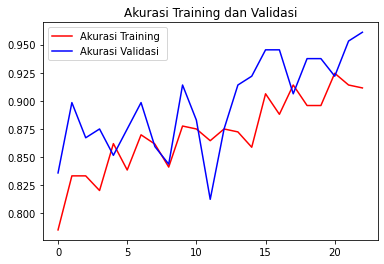

<Figure size 432x288 with 0 Axes>

In [ ]:
#ploting akurasi model
import matplotlib.pyplot as plt                                                   
acc = history.history['accuracy']                                                 
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                          

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                                                 
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          
plt.title('Akurasi Training dan Validasi')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

Saving WhatsApp Image 2022-07-11 at 11.32.34.jpeg to WhatsApp Image 2022-07-11 at 11.32.34.jpeg
WhatsApp Image 2022-07-11 at 11.32.34.jpeg
rock


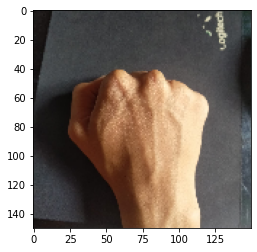

In [ ]:
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                             

uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              
  imgplot = plt.imshow(img)                                                       
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
classes = model.predict(images, batch_size=10)
output_class = np.argmax(classes)
print(fn)
if output_class==0:
    print('paper')
elif output_class==1:
    print('rock')
else:
    print('scissors')